<h1>Tabla de contenidos<span class="tocSkip"></span></h1>


* [1. Análisis Exploratorio De Las Ventas De Los Videojuegos EDA](#Análisis-Exploratorio-De-Las-Ventas-De-Los-Videojuegos-(EDA)) 
* [2. Objetivo del Análisis Exploratorio](#Objetivo) 
* [3. Dataset y Variables](#Dataset-y-variables) 
* [4. Metodología ](#Metodología)
* [5. Análisis Exploratorio](#Análisis-exploratorio)
   * [5.1 Histogramas](#Histogramas)
      * [5.1.1 Análisis Bivariable ](#Análisis-Bivariable)
      * [5.1.2 Gráfica de Densidad ](#Gráfica-de-Densidad)
      * [5.1.3 Distribución Numérica ](#Distribución-Numérica)
      * [5.1.4 Top 10](#Top-10)
          * [5.1.4.1. Top 10 Plataforma ](#Top-10-Plataforma)
          * [5.1.4.2  Top 10 Videojuegos ](#Top-10-Videojuegos)
          * [5.1.4.3  Top 10 Género ](#Top-10-Género)
      * [5.1.5 Videojuegos más demandados ](#Videojuegos-más-comunes)
      * [5.1.7 Gráfico Boxplot](#Gráfico-Boxplot)
* [6. Matriz de correlación](#Matriz-de-correlación)
* [7. Referencias](#Referencias)


<img src= https://elpais.bo/img/images_1200/contents/2020/02/11/12410e79-3b9c-4ea2-a8bc-ae6fe578008d.jpg> 

   # Análisis Exploratorio De Las Ventas De Los Videojuegos (EDA)

### CUNEF - Colegio Universitario De Estudios Financieros 
#### Machine Learning
#### Marta Ruedas Burgos
#### 30-10-2020




# Objetivo

En el kernel que he creado desde la consola analizaré las ventas de videojuegos entre los años 1980 y 2020. El objetivo de este análisis exploratorio es explorar en la mayor medida posible los datos de una manera sencilla, intuitiva e informativa. Siguiendo una secuencia lógica para facilitar la compresión de los datos, además de añadir análisis bivariables y una serie de gráficos. En primer lugar, he examinado los juegos más vendidos de una perspectiva global. Y en segundo lugar, también proporciono información sobre juegos, editores y plataformas.

# Dataset y variables

El Dataset a estudiar contiene 11 variables.



Los campos a estudiar son:

* Name: el nombre del juego


* Platform: plataforma de lanzamiento del juego (es decir, PC, PS4, etc.)


* Year: año de lanzamiento del juego


* Genre: género del juego


* Publisher: editor del juego


* NA_Sales - Ventas en América del Norte (en millones)


* EU_Sales - Ventas en Europa (en millones)


* JP_Sales - Ventas en Japón (en millones)


* Other_Sales - Ventas en el resto del mundo (en millones)


* Global_Sales: ventas mundiales totales.

## Librerías 

Importación de librerias de Python necesarias para este análisis.

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from collections import Counter

## Dataset

Tabla de datos: Venta de videojuegos.

In [388]:
vgsales = pd.read_csv('./data/vgsales.csv', delimiter = ',') # cargamos la tabla 
vgsales 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [389]:
vgsales.Year.min() # Desde el año 1980

1980.0

In [390]:
vgsales.Year.max() # Hasta el año 2020

2020.0

In [391]:
vgsales.tail(5) # ultimas 5 filas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


# Metodología

En este análisis exploratorio voy a tratar de analizar cada una de las características del dataset venta de videojuegos; así como la estructura, información de los datos, descripción y tipos. Además de observar si existen valores NaN que puedan interrumpir este estudio. A continuación mediante histogramas y cálculo numérico determinaré desde una orientación global las ventas mundiales, así como la comparación de Norte América con Europa y con las ventas globales. Seguido de la valoración entre las diez primera plataformas, géneros y videojuegos. Finalmente se elaborará una gráfica dónde represente las correlaciones entre las ventas de los videojuegos entre el año 1980 y 2020.

# Análisis exploratorio 

In [392]:
pd.DataFrame(list(vgsales) , columns = ['Variables']) # lista de variables

,Variables
0,Rank
1,Name
2,Platform
3,Year
4,Genre
5,Publisher
6,NA_Sales
7,EU_Sales
8,JP_Sales
9,Other_Sales


In [393]:
vgsales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Tipo de cada variable 

In [394]:
vgsales.describe() # estadísticos

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Formado por 16.598 filas y 11 columnas

In [395]:
vgsales.shape 

(16598, 11)

In [396]:
vgsales.index 

RangeIndex(start=0, stop=16598, step=1)

In [397]:
vgsales.select_dtypes('object').nunique() # Nombre 'Games', Plataforma, Género, Autor.

Name         11493
Platform        31
Genre           12
Publisher      578
dtype: int64

In [398]:
vgsales.Platform.value_counts() # Diferentes tipos de plataforma y cuantas hay de cada. 

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Quitamos las variables no relevantes.

In [399]:
vgsales = vgsales.drop(["Rank"], axis=1)

In [400]:
vgsales # la columna Rank ya no aparece en la tabla

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


No era relevante. Rank era una variable de varios tipos y los valores eran distintos. 

In [401]:
pd.DataFrame(vgsales.isna().sum(),columns = ['Valores NaN'])

,Valores NaN
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


No hay NAN, no tenemos que igualarlos a 0.

# Histogramas

### Análisis Bivariable

Entre las ventas globales y Europa.

<AxesSubplot:xlabel='Global_Sales', ylabel='EU_Sales'>

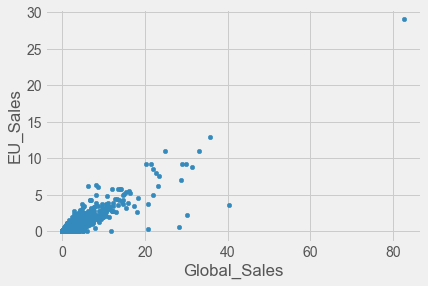

In [402]:
vgsales.plot.scatter(x = 'Global_Sales', y ='EU_Sales')

Observamos que no se encuentra mucha dispersión entre las ventas globales y las ventas en Europa.

Ahora, entre las ventas Norte América y Europa.

<AxesSubplot:xlabel='NA_Sales', ylabel='EU_Sales'>

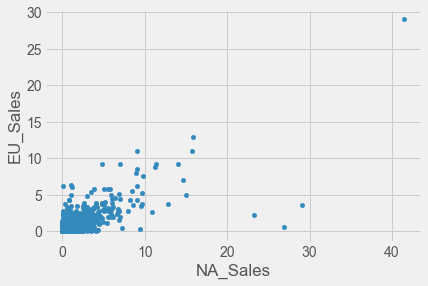

In [403]:
vgsales.plot.scatter(x = 'NA_Sales', y ='EU_Sales')

Observamos que hay más dispersión entre las ventas de Norte América y Europa, aunque es muy similar al anterior.

### Gráfica de Densidad

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


/Users/martaruedas/opt/anaconda3/envs/eda_environment/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


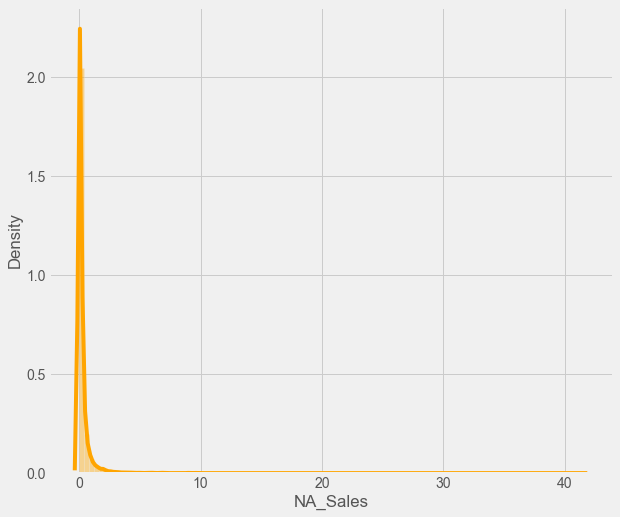

In [404]:
print(vgsales['NA_Sales'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(vgsales['NA_Sales'], color='orange', bins=100, hist_kws={'alpha': 0.4});

Función de densidad, interpretamos las ventas de Norte América. Las probabilidades estan muy concentrada entre los valores 0.0 y 3.0. 

### Distribución numérica

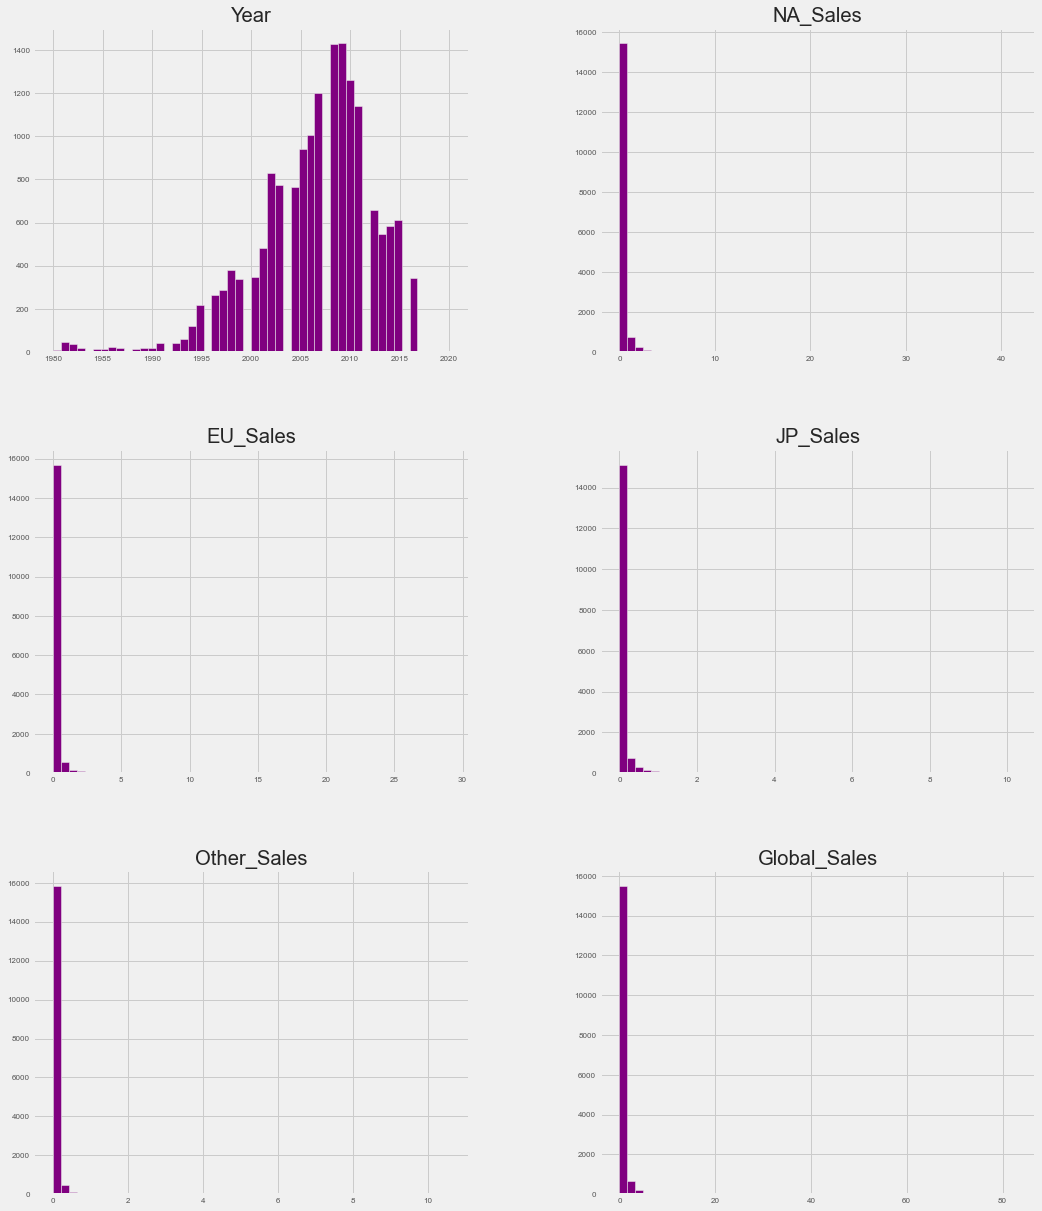

In [405]:
vgsales.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color="purple"); 

Las ventas son muy uniformes en cada una de las variables de la tabla. La mayoría de los gráficos son iguales o prácticamente igual. 
Destacamos que entre los años 2008 y 2014 hubo un aumento considerable en la venta de videojuegos mundialmente.

### TOP 10 

### Top 10 Plataforma

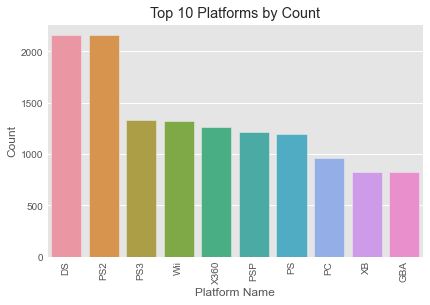

In [406]:
# Bar plot de las 10 plataformas más comunes
platform = Counter(vgsales['Platform'].tolist()).most_common(10)
names = [x[0] for x in platform]
counts = [x[1] for x in platform]

plt.style.use("ggplot")
sns.barplot(x=names, y=counts)
plt.title("Top 10 Platforms by Count")
plt.xlabel("Platform Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Las dos plataformas más usadas de videojuegos son DS y PS2. Y la menos usada destacamos la XB.

### Top 10 Videojuegos

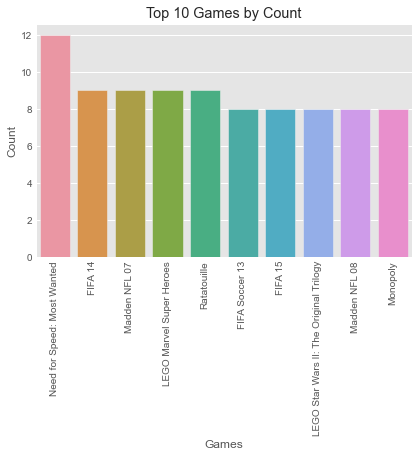

In [407]:
# Bar plot de los 10 videojuegos más comunes
platform = Counter(vgsales['Name'].tolist()).most_common(10)
names = [x[0] for x in platform]
counts = [x[1] for x in platform]

plt.style.use("ggplot")
sns.barplot(x=names, y=counts)
plt.title("Top 10 Games by Count")
plt.xlabel("Games")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

El videojuego más demandado ha sido "Need for Speed: Most Wanted". FIFA 14 superó la demanda con respecto a la demanda que tuvo FIFA Soccer 13 y FIFA 15. 

### Top 10 Género

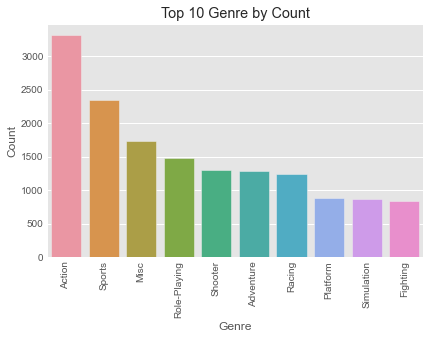

In [408]:
# Bar plot de los 10 géneros más comunes
platform = Counter(vgsales['Genre'].tolist()).most_common(10)
names = [x[0] for x in platform]
counts = [x[1] for x in platform]

plt.style.use("ggplot")
sns.barplot(x=names, y=counts)
plt.title("Top 10 Genre by Count")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

El videojuego más comprado desde hace años son los videojuegos de acción con una diferencia de 1500 ventas con respecto al segundo que son los videojuegos de deportes. 

### Videojuegos más demandados

Histograma de las plataformas y diferentes géneros

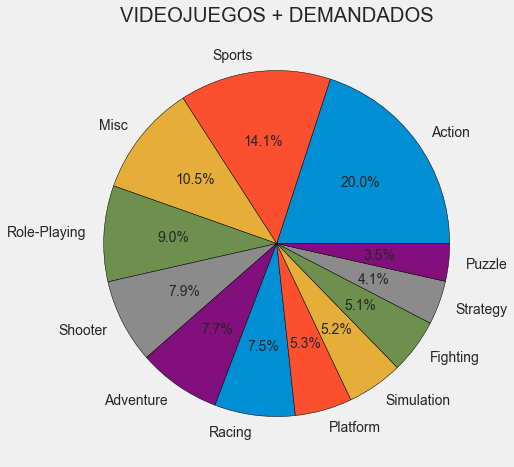

In [412]:
# 12 géneros más demandados en Videojuegos
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(7,7))
plt.pie(list(vgsales['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('VIDEOJUEGOS + DEMANDADOS')
plt.tight_layout()
plt.show()

Los videojuegos de acción son los más solicitados con un 20% del total.  Seguido de los videojuegos de deporte con un 14.1 %.  Y los videojuegos menos solicitados con menor porcentaje de venta encontramos los de puzzle y estratégia con un 3.5% y 4.1% respectivamente. 

### Gráfico Boxplot 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Platform'),
  Text(2, 0, 'Racing'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Puzzle'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

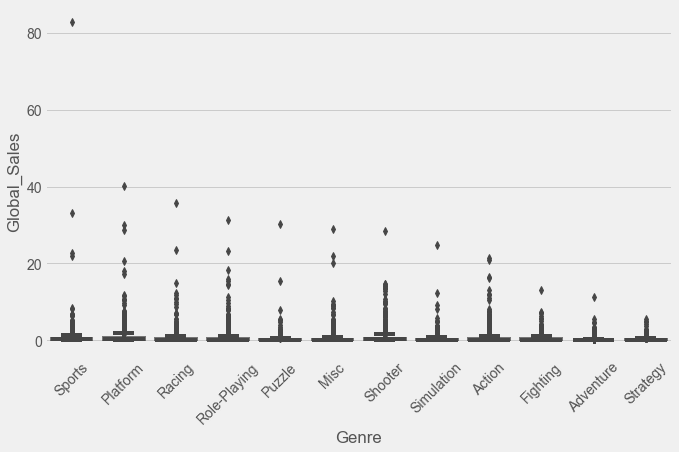

In [410]:
plt.figure(figsize = (10, 6)) 
ax = sns.boxplot(x='Genre', y='Global_Sales', data=vgsales)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

 Hay mas dispersion en los videojuegos de deporte con respecto a la media de las ventas globales. Estrategia destaca por su poca dispersión a las ventas globales.

<img src= https://i.blogs.es/f52c71/mejores-juegos-nintendo-switch/450_1000.jpg> 

# Matriz de correlación

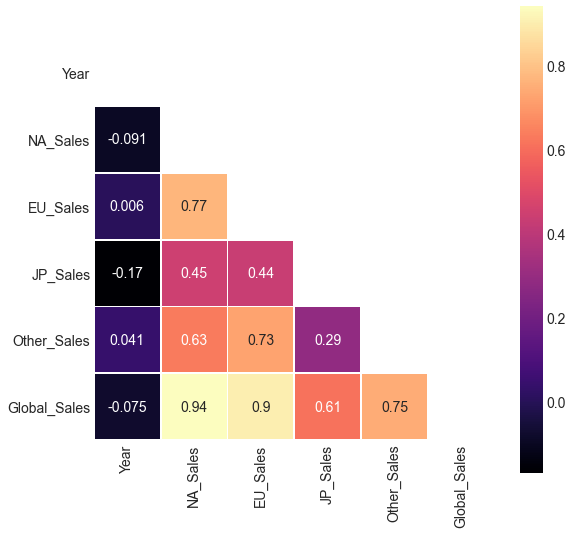

In [411]:
corr = vgsales.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="magma",annot=True)

En la matriz de correlación examinamos que si aumentan las ventas en Norte América subirán las ventas globales casi a una igual medida. En cambio si las ventas de Norte América suben las ventas en otros paises no son tan probables que aumenten en la misma proporción. 

# Referencias

Dataset videojuegos: https://www.kaggle.com/gregorut/videogamesales 

Primera imagen: https://elpais.bo/img/images_1200/contents/2020/02/11/12410e79-3b9c-4ea2-a8bc-ae6fe578008d.jpg 

Segunda imagen: https://i.blogs.es/f52c71/mejores-juegos-nintendo-switch/450_1000.jpg

Histograma: https://towardsdatascience.com/exploratory-data-analysis-tutorial-in-python-15602b417445 

Histograma: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python 
